In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
import sklearn
import pandas as pd
import pickle
import seaborn as sns
from scipy import stats

# TODO : Importation des librairies
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_diabetes

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, Perceptron, RidgeClassifier, SGDRegressor, PassiveAggressiveRegressor, LinearRegression, Lasso, ElasticNet, Ridge, HuberRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

from sklearn.cluster import KMeans, AgglomerativeClustering, Birch, DBSCAN, MiniBatchKMeans, MeanShift, OPTICS, AffinityPropagation
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
import sklearn
import pandas as pd
import pickle

#metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_val_predict
import tensorflow as tf


2023-06-29 07:42:15.545445: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-29 07:42:15.579639: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-29 07:42:15.580379: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-29 07:42:16.127228: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Loader le dataset

In [3]:
df = pd.read_csv('../Datasets_sauvegardes/dataset-fraude-detection-fusionner-sans-nan-feature-ingeniering-18-06-2023.csv')

In [4]:
pd.set_option('display.max_columns', None)
df.head(5)

,isFraud,TransactionAmt,ProductCD,card1,card3,card5,card6,addr2,dist2,P_emaildomain,R_emaildomain,C1,C2,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,D1,D2,D3,D4,D5,D6,D9,D10,D11,D12,D14,D15,M4,M6,M7,M8,V3,V4,V5,V10,V11,V12,V13,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V26,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V66,V67,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V90,V91,V92,V93,V94,V98,V99,V100,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V129,V131,V138,V139,V140,V141,V142,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V165,V169,V170,V171,V174,V175,V176,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V208,V210,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V235,V236,V237,V238,V239,V242,V243,V244,V245,V246,V247,V248,V249,V250,V252,V253,V254,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V270,V271,V272,V273,V274,V275,V276,V277,V278,V281,V282,V283,V284,V287,V288,V289,V290,V291,V292,V300,V301,V302,V303,V304,V309,V310,V312,V313,V314,V315,id_02,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_31,id_35,id_37,id_38,DeviceType,DeviceInfo,sunMontTran_by_client
0,0,68.5,4,13926,150,142,1,87,7,16,16,1,1,0,0,1,0,0,1,0,2,0,1,14,0,13,0,0,0,0.791666,13,13,0,0,0,2,1,0,0,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0,1,1,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,70787,1,1,166,542,144,1,1,123,1,1,1,1,954,68.5
1,0,29.0,4,2755,150,102,1,87,7,16,16,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0.791666,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0,1,1,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,98945,1,1,166,621,500,1,1,98,1,0,1,1,1727,29.0
2,0,59.0,4,4663,150,166,2,87,7,35,16,1,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0.791666,0,315,0,0,315,0,0,0,0,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0,1,1,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,191631,0,0,121,410,142,0,0,44,0,1,1,0,1598,59.0
3,0,50.0,4,18132,150,117,2,87,7,53,16,2,5,0,0,4,0,0,1,0,1,0,25,112,112,0,94,0,0,0.791666,84,0,0,0,111,0,0,0,0,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,10,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,135.0,0,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0,1,1,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,

In [5]:
df_copie = df.copy()

In [6]:
df_copie.shape

(590540, 289)

In [7]:
# Separer X et y
y = df_copie['isFraud']
X = df_copie.drop(['isFraud'], axis=1)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

In [9]:
#Utiliser la méthode du PCA afin de réduire la dimensionalité à 200 attributs

from sklearn.decomposition import PCA

pca = PCA(n_components=200)

X_pca_200 = pca.fit_transform(X_sc)

In [10]:
'''
#PCA = 250 attributs
from sklearn.decomposition import PCA

pca = PCA(n_components=250)

X_pca_250 = pca.fit_transform(X_sc)
'''

'\n#PCA = 250 attributs\nfrom sklearn.decomposition import PCA\n\npca = PCA(n_components=250)\n\nX_pca_250 = pca.fit_transform(X_sc)\n'

In [50]:
X_pca_250.shape

(590540, 250)

In [11]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca_200, y, random_state=1, test_size=0.20, stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((472432, 200), (118108, 200), (472432,), (118108,))

In [12]:
#over_sampling sur les donnees d'entrainement

from imblearn.over_sampling import SMOTE
sm = SMOTE()

X_train, y_train = sm.fit_resample(X_train, y_train)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((911804, 200), (118108, 200), (911804,), (118108,))

In [13]:
#Creation d'un tableau pour contenier nos prediction de score
scores = []

In [14]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(criterion='entropy', max_features='sqrt', max_samples=0.5, min_samples_split=80)
rf_clf.fit(X_train, y_train)
y_predproba = rf_clf.predict_proba(X_test)
print(f'Validation AUC={roc_auc_score(y_test, y_predproba[:, 1])}')
# Sauvegarder le model
#filename = '../Models_sauvegardes/fraude_detection_rf_clf_model_28-06-2023.sav'
#pickle.dump(rf_clf, open(filename, 'wb'))

Validation AUC=0.9084347167579496


In [20]:

y_predproba[:, 0]

array([0.88574522, 0.96733172, 0.81234524, ..., 0.98907319, 0.96524836,
       0.06405762])

In [17]:
y_predproba

array([[0.88574522, 0.11425478],
       [0.96733172, 0.03266828],
       [0.81234524, 0.18765476],
       ...,
       [0.98907319, 0.01092681],
       [0.96524836, 0.03475164],
       [0.06405762, 0.93594238]])

In [12]:
# rf_clf

rf_clf = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42))
rf_clf.fit(X_train, y_train)
scores.append(['Random Forest Classifier', rf_clf.score(X_test, y_test)])
print('score Random Forest Classifier',rf_clf.score(X_test, y_test))



KeyboardInterrupt: 

In [15]:
y_pred_rf_clf = rf_clf.predict(X_test)
y_pred_rf_clf

array([0, 0, 0, ..., 0, 0, 1])

In [16]:
print('Precision: %.3f' % precision_score(y_test, y_pred_rf_clf))
print('Recall: %.3f' % recall_score(y_test, y_pred_rf_clf))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_rf_clf))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_rf_clf))
from sklearn import metrics
print('AUC = %.2f' % roc_auc_score(y_test, y_pred_rf_clf))  #1


Precision: 0.357
Recall: 0.669
Accuracy: 0.946
F1 Score: 0.465
AUC = 0.81


In [17]:
# Définition d'un seuil de classification (par exemple 60%)
threshold = 0.6

# Labels prédits pour un seuil donné
label_pred_threshold = (y_pred_rf_clf > threshold).astype(int)
# Calcul de la matrice de confusion pour un seuil donné
matrix_threshold = confusion_matrix(
    y_true=y_test, y_pred=label_pred_threshold
)

print(matrix_threshold)

[[108991   4984]
 [  1370   2763]]


In [20]:
# Extract the true positive, true negative, false positive, and false negative values from the confusion matrix
tp, fp, fn, tn = matrix_threshold.ravel()
 
# Print the true positive, true negative, false positive, and false negative values
print("True Positive (TP): ", tp)
print("True Negative (TN): ", tn)
print("False Positive (FP): ", fp)
print("False Negative (FN): ", fn)

True Positive (TP):  113318
True Negative (TN):  2427
False Positive (FP):  657
False Negative (FN):  1706


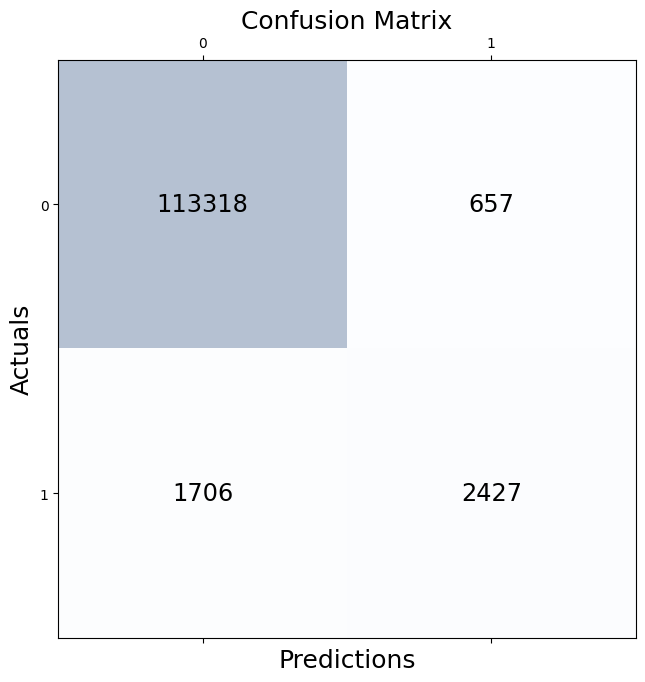

In [22]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_rf_clf)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [24]:
df_prediction_rfc = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred_rf_clf})
df_prediction_rfc

,Actual,Predicted
203495,0,0
227933,0,0
262769,0,0
388075,0,0
46351,0,0
...,...,...
124716,0,0
338566,0,0
390049,0,0
380116,0,0


In [25]:
#Create classification report
from sklearn.metrics import classification_report

class_report=classification_report(y_test, y_pred_rf_clf)
print(class_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    113975
           1       0.79      0.59      0.67      4133

    accuracy                           0.98    118108
   macro avg       0.89      0.79      0.83    118108
weighted avg       0.98      0.98      0.98    118108



# catboost

In [26]:
from catboost import CatBoostClassifier

Cat_Boost = CatBoostClassifier(verbose=0, n_estimators=100)
Cat_Boost.fit(X_train, y_train)
scores.append(['score Cat_Boost', Cat_Boost.score(X_test, y_test)])
print('score Cat_Boost',Cat_Boost.score(X_test, y_test))

# Sauvegarder notre model
filename = '../Models_sauvegardes/fraude_detection_model_catboost_26-06-2023.sav'
pickle.dump(Cat_Boost, open(filename, 'wb'))

score Cat_Boost 0.9552612862803536


In [27]:
y_pred_catBoost = Cat_Boost.predict(X_test)
y_pred_catBoost

array([0, 0, 0, ..., 0, 0, 1])

In [28]:
print('Precision: %.3f' % precision_score(y_test, y_pred_catBoost))
print('Recall: %.3f' % recall_score(y_test, y_pred_catBoost))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_catBoost))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_catBoost))
print('AUC = %.2f' % roc_auc_score(y_test, y_pred_rf_clf))

Precision: 0.403
Recall: 0.581
Accuracy: 0.955
F1 Score: 0.476


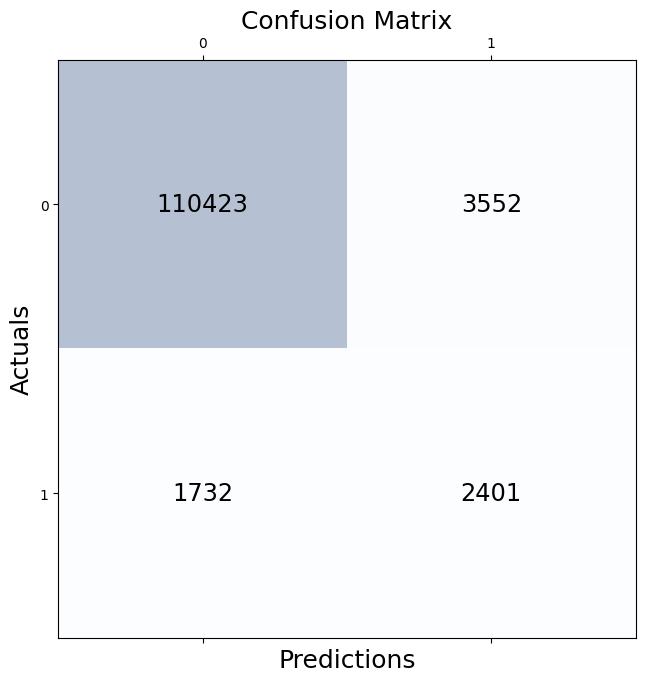

In [35]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_catBoost)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [36]:
# Extract the true positive, true negative, false positive, and false negative values from the confusion matrix
tp, fp, fn, tn = conf_matrix.ravel()
 
# Print the true positive, true negative, false positive, and false negative values
print("True Positive (TP): ", tp)
print("True Negative (TN): ", tn)
print("False Positive (FP): ", fp)
print("False Negative (FN): ", fn)

True Positive (TP):  110423
True Negative (TN):  2401
False Positive (FP):  3552
False Negative (FN):  1732
